# Data Feature Engineering
Making New / Combining features / removing old features.
- Saving these Different combinations as Dataframes in "data" folder


The data can be found here: https://www.kaggle.com/yasserh/breast-cancer-dataset

Documentation can be found here: https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(diagnostic)

You can also find the github repo here: https://github.com/brianl2/BrCancer_LHL_final
Note: 
Attribute information

1) ID number
2) Diagnosis (M = malignant, B = benign)
3-32)

Ten real-valued features are computed for each cell nucleus:

   a) radius (mean of distances from center to points on the perimeter)
   b) texture (standard deviation of gray-scale values)
   c) perimeter
   d) area
   e) smoothness (local variation in radius lengths)
   f) compactness (perimeter^2 / area - 1.0)
   g) concavity (severity of concave portions of the contour)
   h) concave points (number of concave portions of the contour)
   i) symmetry 
   j) fractal dimension ("coastline approximation" - 1)

The mean, standard error, and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features.  

For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

Worst is the mean of the largest values 

In [71]:
# importing modules
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 

In [74]:
# read in the cleaned dataframe 
brca = pd.read_csv('brca.csv')

In [75]:
# print dataframe
brca.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [76]:
# There are some outliers which , as we saw in Data Exploration, we can make a dataset without outliers to see how the model performs. 
outliers = brca.copy()

for i in [i for i in outliers.columns]:
    if outliers[i].nunique()>=12:
        Q1 = outliers[i].quantile(0.15)
        Q3 = outliers[i].quantile(0.85)
        IQR = Q3 - Q1
        outliers = outliers[outliers[i] <= (Q3+(1.5*IQR))]
        outliers = outliers[outliers[i] >= (Q1-(1.5*IQR))]
outliers = outliers.reset_index(drop=True)

print(f'Before removal of outliers, The dataset had {brca.shape[0]} samples.')
print(f'After removal of outliers, The dataset now has {outliers.shape[0]} samples.')

Before removal of outliers, The dataset had 569 samples.
After removal of outliers, The dataset now has 502 samples.


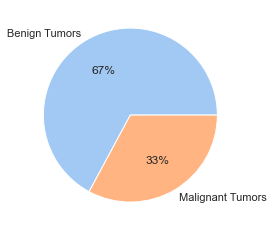

In [80]:
#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]
data = outliers['diagnosis'].value_counts()
labels =['Benign Tumors','Malignant Tumors']
#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

Just about the same ratio (63% to 37% before removal of outliers) -> It seems like dropping the outliers still might require oversampling or undersampling techniques

In [13]:
# Dataset without outliers - Save in data
outliers.to_csv('data/outliersrm.csv', index = False)

In [49]:
# creating a dataframe with an average of the mean + worst as a new feature
# defining a function
def create_average(column1, column2, columnname):
    brca[columnname] = (brca[column1] + brca[column2]) / 2 
    
def create_average_out(column1, column2, columnname):
    outliers[columnname] = (outliers[column1] + outliers[column2]) / 2 

In [40]:
# get list of names
features = [i for i in brca.columns.values if i not in ['diagnosis','id']]
mean = features[0:10]
worst = features[20
names = ['radius', 'texture', 'perimeter', 'area', 'smoothness', 'compactness', 'concavity', 'concave', 'symmetry', 'fractal_dimension']:30]

In [46]:
# Create new columns for the average between worst and mean
for (a, b, c) in zip(mean, worst, names):
     create_average(a, b, c)

# repeat for outliers removed set
for (a, b, c) in zip(mean, worst, names):
     create_average_out(a, b, c)

In [57]:
#checking DF (averaged out )
print(brca.head(5))
brca.to_csv('data/averaged_brca.csv', index = False)

   diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          0        17.99         10.38          122.80     1001.0   
1          0        20.57         17.77          132.90     1326.0   
2          0        19.69         21.25          130.00     1203.0   
3          0        11.42         20.38           77.58      386.1   
4          0        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius  texture  perimeter    area  smoothness  \
0         0.2419  ...  21.685   13.855    1

In [55]:
# checking DF & saving DF (averaged between two features, and outliers removed.)
print(outliers.head(5))
outliers.to_csv('data/averaged_outliersrm.csv', index = False)

   diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          0        20.57         17.77          132.90     1326.0   
1          0        19.69         21.25          130.00     1203.0   
2          0        20.29         14.34          135.10     1297.0   
3          0        12.45         15.70           82.57      477.1   
4          0        18.25         19.98          119.60     1040.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.08474           0.07864          0.0869              0.07017   
1          0.10960           0.15990          0.1974              0.12790   
2          0.10030           0.13280          0.1980              0.10430   
3          0.12780           0.17000          0.1578              0.08089   
4          0.09463           0.10900          0.1127              0.07400   

   symmetry_mean  ...  radius  texture  perimeter     area  smoothness  \
0         0.1812  ...  22.780   20.590    

In [59]:
# Dataframe with only features engineered + outliers removed
rm = outliers[names]
rm.to_csv('data/featuresavg_outrm.csv', index = False)

In [63]:
# Dataframe with only features engineered 
rmbrca = brca[names]
rmbrca.to_csv('data/featuresavg.csv', index = False)